   
<div style="background-image: linear-gradient(to left, rgb(255, 255, 255), rgb(138, 136, 136)); width: auto; margin: 10px;">
  <img src="https://upload.wikimedia.org/wikipedia/en/thumb/f/fd/University_of_Tehran_logo.svg/225px-University_of_Tehran_logo.svg.png" width=100px width=auto style="padding:10px; vertical-align: center;">

</div>
   
<div   style:"text-align: center; background-image: linear-gradient(to left, rgb(255, 255, 255), rgb( 219, 204, 245  ));width: 400px; height: 30px; ">
<h1 style="font-family: Georgia; color: black; text-align: center; ">Course: Data Science </h1>

</div>
    <div   style:"border: 3px solid green;text-align: center; ">
<h1 style="font-family: Georgia; color: black; text-align: center; ">CA6-Introduction to Data Science</h1>
        <h1 style="font-family: Georgia; color: black; text-align: center; ">Team memebers:</h1>

</div>

<div>    
<h1 style="font-family: Georgia; color: black; text-align: center; font-size:15px;">Shahzad Momayez- 810100272 </h1>
<h1 style="font-family: Georgia; color: black; text-align: center; font-size:15px;">Mohammad Amanlou- 810100084 </h1>
<h1 style="font-family: Georgia; color: black; text-align: center; font-size:15px;">Amir Mahdi Farzaneh- 810100194 </h1>

</div>
   </html>

## The purpose of the assignment:
....


<html> 
    <div  style="font-family: Georgia ;background-image: linear-gradient(to left,  rgb(255, 255, 255), rgba(127, 170, 225,0.8)); width: auto; margin: 10px;"> <h1>  Part1 : Preprocessing </h1>
    </div>
</html>

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
import json
from sklearn.impute import KNNImputer

In [14]:
pd.set_option('display.max_rows', None)
df = pd.read_csv("diabetic_data.csv")
df.head(10)

encounter_id  patient_nbr             race  gender       age weight  \
0       2278392      8222157        Caucasian  Female    [0-10)      ?   
1        149190     55629189        Caucasian  Female   [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female   [20-30)      ?   
3        500364     82442376        Caucasian    Male   [30-40)      ?   
4         16680     42519267        Caucasian    Male   [40-50)      ?   
5         35754     82637451        Caucasian    Male   [50-60)      ?   
6         55842     84259809        Caucasian    Male   [60-70)      ?   
7         63768    114882984        Caucasian    Male   [70-80)      ?   
8         12522     48330783        Caucasian  Female   [80-90)      ?   
9         15738     63555939        Caucasian  Female  [90-100)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   
5                  2                         1                    2   
6                  3                         1                    2   
7                  1                         1                    7   
8                  2                         1                    4   
9                  3                         3                    4   

   time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
0                 1  ...          No      No                   No   
1                 3  ...          No      Up                   No   
2                 2  ...          No      No                   No   
3                 2  ...          No      Up                   No   
4                 1  ...          No  Steady                   No   
5                 3  ...          No  Steady                   No   
6                 4  ...          No  Steady                   No   
7                 5  ...          No      No                   No   
8                13  ...          No  Steady                   No   
9                12  ...          No  Steady                   No   

   glipizide-metformin  glimepiride-pioglitazone  metformin-rosiglitazone  \
0                   No                        No                       No   
1                   No                        No                       No   
2                   No                        No                       No   
3                   No                        No                       No   
4                   No                        No                       No   
5                   No                        No                       No   
6                   No                        No                       No   
7                   No                        No                       No   
8                   No                        No                       No   
9                   No                        No                       No   

   metformin-pioglitazone  change diabetesMed readmitted  
0                      No      No          No         NO  
1                      No      Ch         Yes        >30  
2                      No      No         Yes         NO  
3                      No      Ch         Yes         NO  
4                      No      Ch         Yes         NO  
5                      No      No         Yes        >30  
6                      No      Ch         Yes         NO  
7                      No      No         Yes        >30  
8                      No      Ch         Yes         NO  
9                      No      Ch         Yes         NO  

[10 rows x 50 columns]

In [15]:
df.describe()

encounter_id   patient_nbr  admission_type_id  \
count  1.017660e+05  1.017660e+05      101766.000000   
mean   1.652016e+08  5.433040e+07           2.024006   
std    1.026403e+08  3.869636e+07           1.445403   
min    1.252200e+04  1.350000e+02           1.000000   
25%    8.496119e+07  2.341322e+07           1.000000   
50%    1.523890e+08  4.550514e+07           1.000000   
75%    2.302709e+08  8.754595e+07           3.000000   
max    4.438672e+08  1.895026e+08           8.000000   

       discharge_disposition_id  admission_source_id  time_in_hospital  \
count             101766.000000        101766.000000     101766.000000   
mean                   3.715642             5.754437          4.395987   
std                    5.280166             4.064081          2.985108   
min                    1.000000             1.000000          1.000000   
25%                    1.000000             1.000000          2.000000   
50%                    1.000000             7.000000          4.000000   
75%                    4.000000             7.000000          6.000000   
max                   28.000000            25.000000         14.000000   

       num_lab_procedures  num_procedures  num_medications  number_outpatient  \
count       101766.000000   101766.000000    101766.000000      101766.000000   
mean            43.095641        1.339730        16.021844           0.369357   
std             19.674362        1.705807         8.127566           1.267265   
min              1.000000        0.000000         1.000000           0.000000   
25%             31.000000        0.000000        10.000000           0.000000   
50%             44.000000        1.000000        15.000000           0.000000   
75%             57.000000        2.000000        20.000000           0.000000   
max            132.000000        6.000000        81.000000          42.000000   

       number_emergency  number_inpatient  number_diagnoses  
count     101766.000000     101766.000000     101766.000000  
mean           0.197836          0.635566          7.422607  
std            0.930472          1.262863          1.933600  
min            0.000000          0.000000          1.000000  
25%            0.000000          0.000000          6.000000  
50%            0.000000          0.000000          8.000000  
75%            0.000000          1.000000          9.000000  
max           76.000000         21.000000         16.000000

In [16]:
df["examide"].unique()

array(['No'], dtype=object)

In [17]:
df["citoglipton"].unique()

array(['No'], dtype=object)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

# handle duplication

In [19]:
 df.duplicated().sum()

0

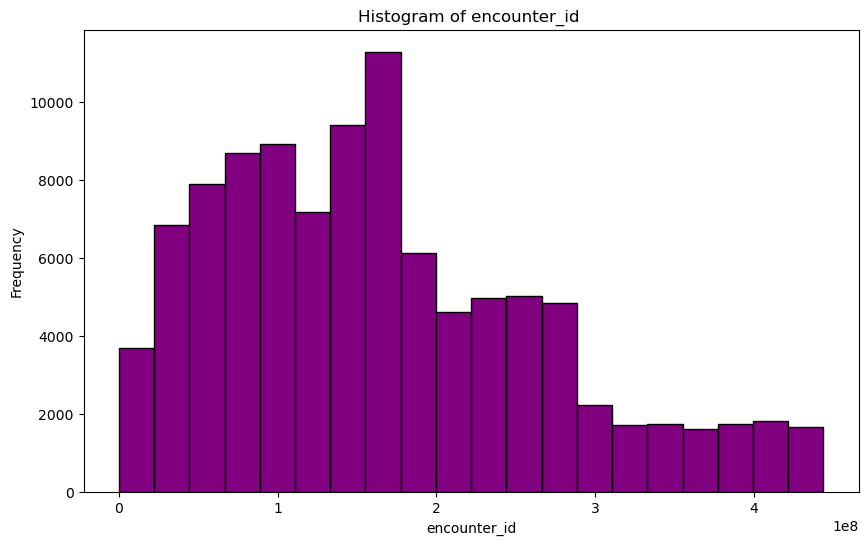

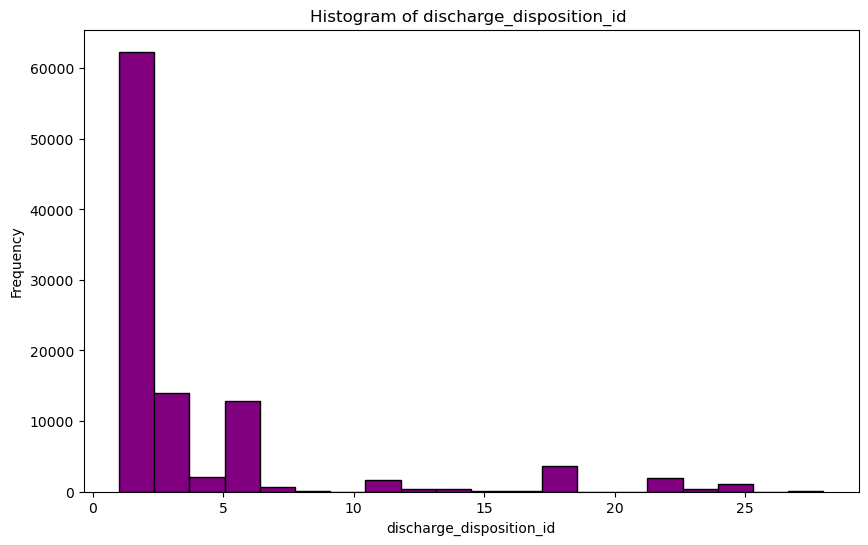

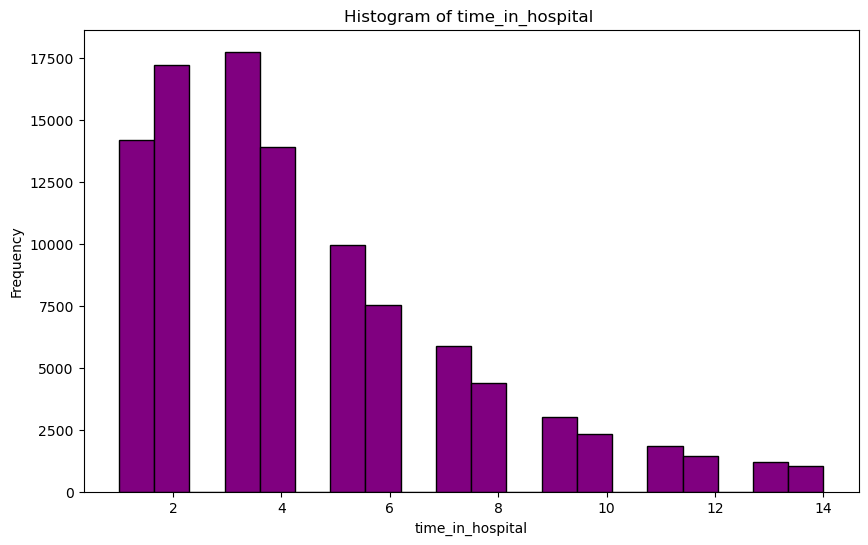

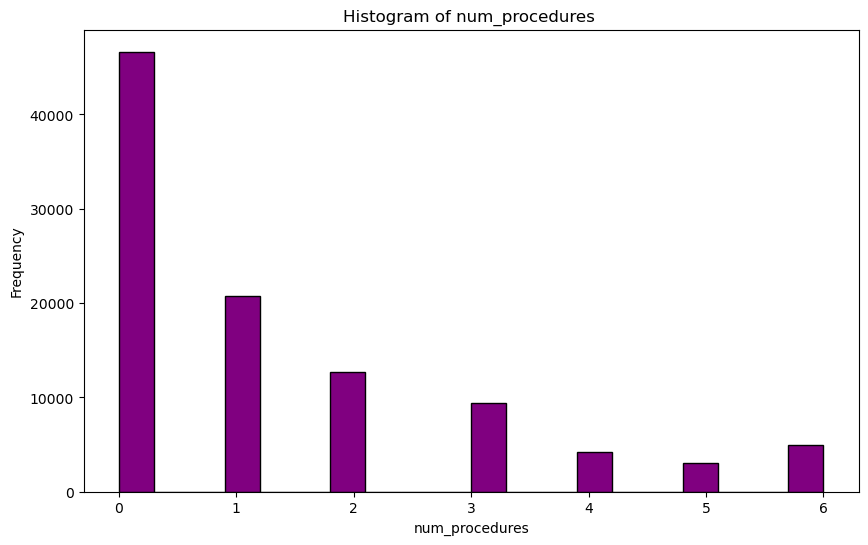

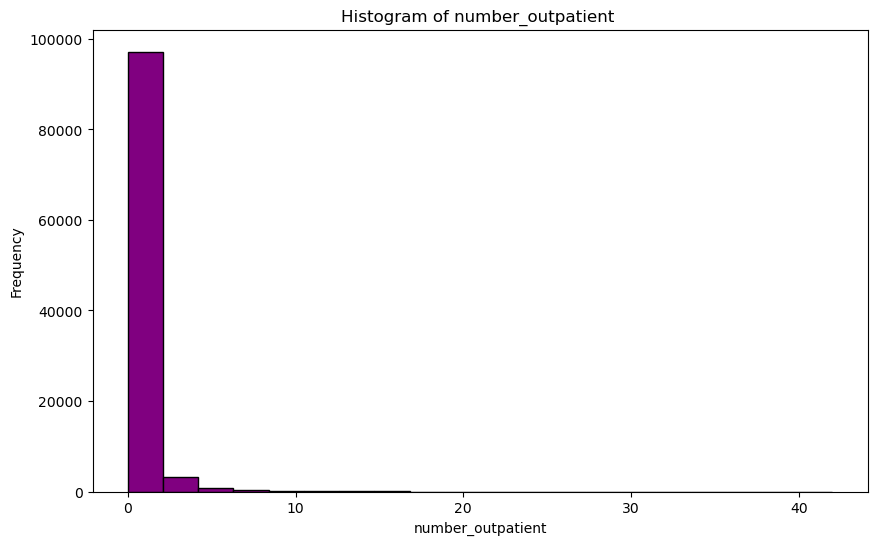

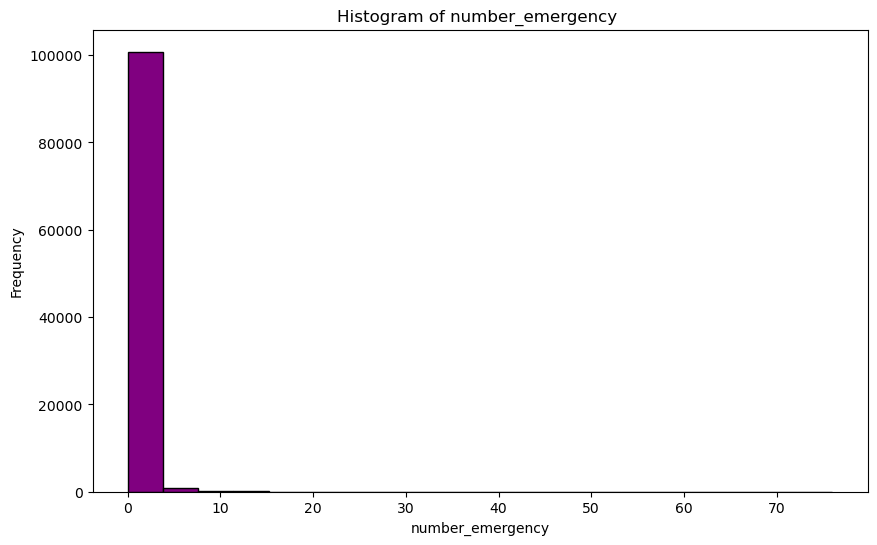

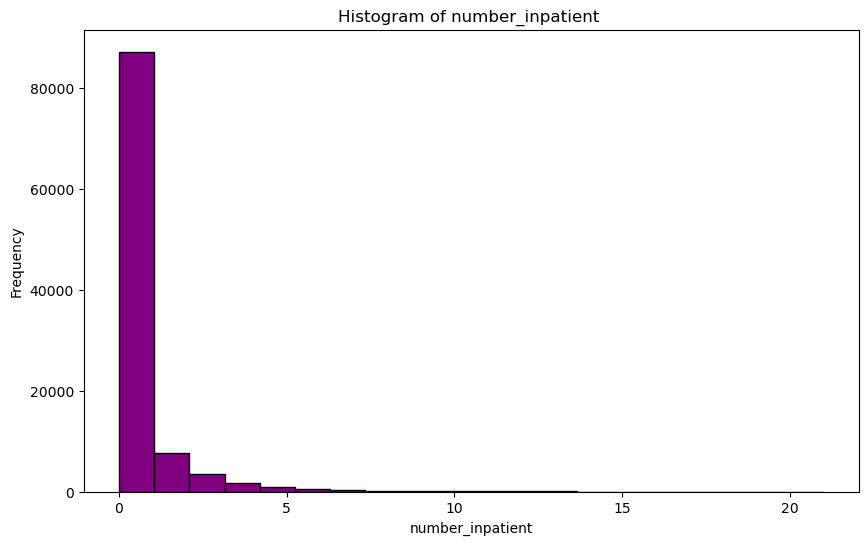

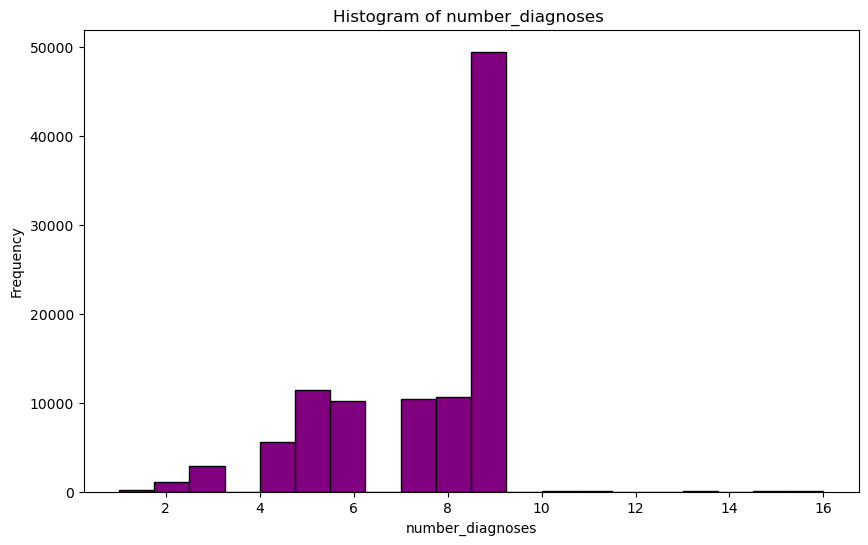

In [20]:
for column in df.select_dtypes(include=[np.number]).columns:
    df[column].plot(kind='hist', bins=20, color='purple', edgecolor='black', figsize=(10, 6))
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column} ')
    plt.show()
    

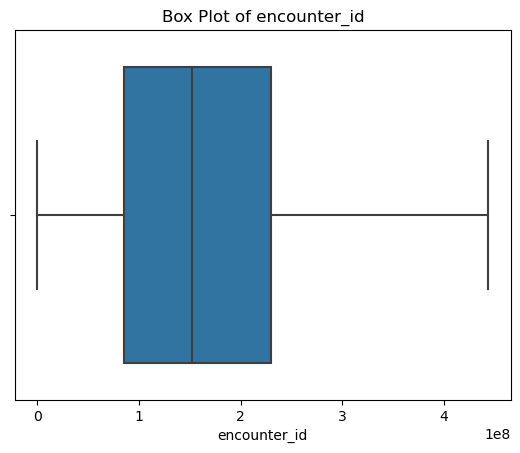

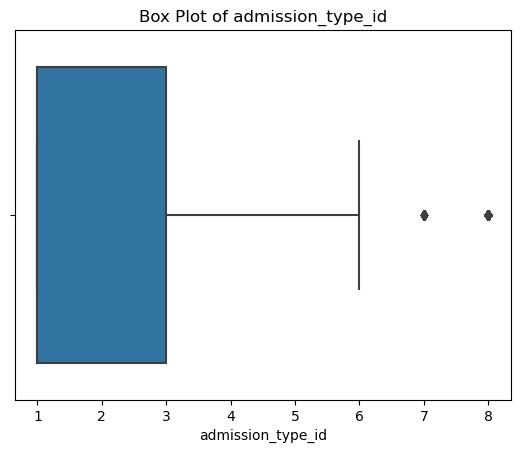

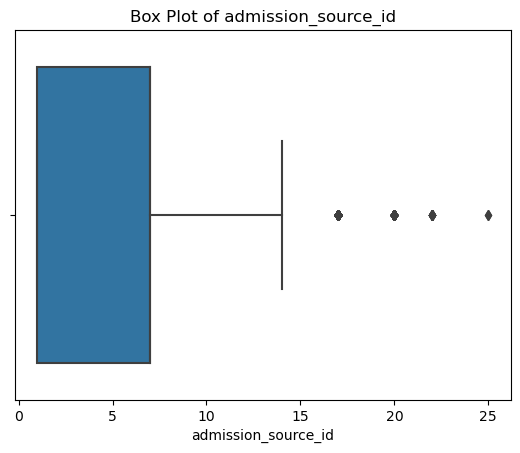

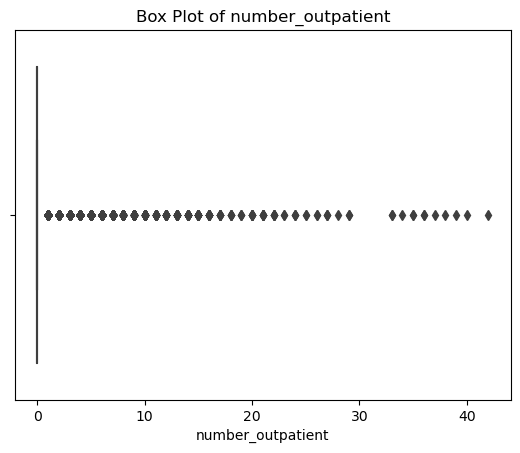

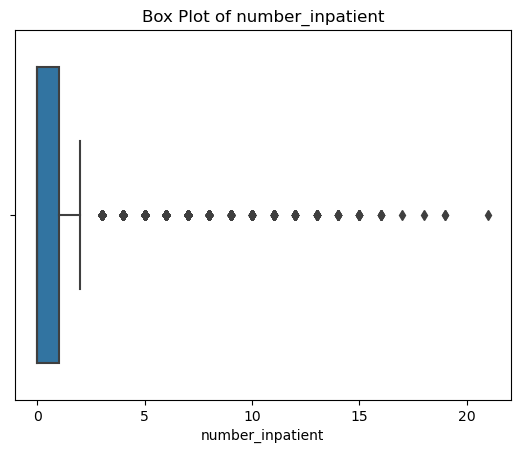

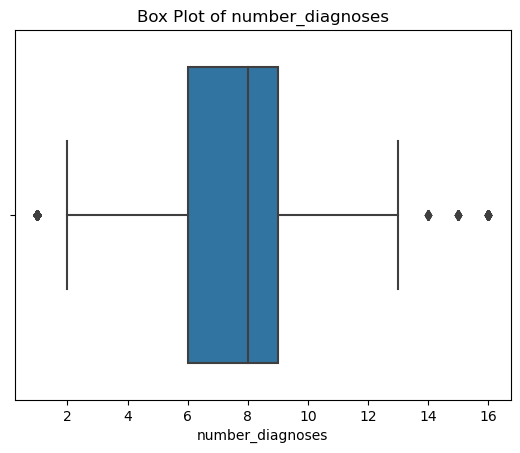

In [21]:
for column in df.select_dtypes(include=[np.number]).columns:
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')
    plt.show()

In [22]:
non_numerical_columns = df.select_dtypes(exclude='number').columns
category_counts = {}

for col in non_numerical_columns:
    category_counts[col] = df[col].value_counts()
    
for col, counts in category_counts.items():
    print(f"Category counts for column '{col}':")
    print(counts)
    print()

Category counts for column 'race':
Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

Category counts for column 'gender':
Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

Category counts for column 'age':
[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64

Category counts for column 'weight':
?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: weight, dtype: int64

Category counts for column 'payer_code':
?     40256
MC    32439
HM     6274
SP     5007
BC     4655
MD     3532
CP     2533
UN     2448
CM     1937
OG    

In [23]:
df.replace("?", np.nan, inplace=True)
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index(['race', 'gender', 'age', 'weight', 'payer_code', 'medical_specialty',
       'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [24]:
df.isna().sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

# handle missing values

In [25]:

#### use knn imputer to fill missing categorical vallues 
#race


##col = diabetic_df.select_dtypes(include=[np.number,'float']).columns.to_list()
#selected_data = diabetic_df[col]

#imputer = KNNImputer(n_neighbors=5)
#df_imputed = pd.DataFrame(imputer.fit_transform(diabetic_df), columns=diabetic_df.columns)

#print("\nDataFrame after KNN imputation:")
#df_imputed

In [26]:
cols_with_null = ['race', 'payer_code' ,'medical_specialty' ,'diag_1','diag_2','diag_3'  ]
for col in cols_with_null:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [27]:
categorical_columns = df.select_dtypes(include=['object']).columns
le = LabelEncoder()

for col in categorical_columns:
    df[col] = le.fit_transform(df[col].astype(str))


In [28]:
for col in non_numerical_columns:
    category_counts[col] = df[col].value_counts()
    
for col, counts in category_counts.items():
    print(f"Category counts for column '{col}':")
    print(counts)
    print()

Category counts for column 'race':
2    78372
0    19210
3     2037
4     1506
1      641
Name: race, dtype: int64

Category counts for column 'gender':
0    54708
1    47055
2        3
Name: gender, dtype: int64

Category counts for column 'age':
7    26068
6    22483
5    17256
8    17197
4     9685
3     3775
9     2793
2     1657
1      691
0      161
Name: age, dtype: int64

Category counts for column 'weight':
9    98569
8     1336
7      897
2      625
3      145
6       97
1       48
4       35
5       11
0        3
Name: weight, dtype: int64

Category counts for column 'payer_code':
7     72695
6      6274
14     5007
0      4655
8      3532
3      2533
15     2448
2      1937
10     1033
12      592
4       549
1       146
16      135
11       95
9        79
13       55
5         1
Name: payer_code, dtype: int64

Category counts for column 'medical_specialty':
18    64584
8      7565
11     7440
3      5352
62     3099
19     1613
27     1400
28     1233
52     1140
51      8

In [29]:
#remove columns with almost 1 value

df.drop(columns=["citoglipton","examide",'weight','metformin-pioglitazone', 'metformin-rosiglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin'], inplace=True)

# remove outliers

In [30]:
df.describe()


encounter_id   patient_nbr           race         gender  \
count  1.017660e+05  1.017660e+05  101766.000000  101766.000000   
mean   1.652016e+08  5.433040e+07       1.665782       0.462443   
std    1.026403e+08  3.869636e+07       0.853745       0.498649   
min    1.252200e+04  1.350000e+02       0.000000       0.000000   
25%    8.496119e+07  2.341322e+07       2.000000       0.000000   
50%    1.523890e+08  4.550514e+07       2.000000       0.000000   
75%    2.302709e+08  8.754595e+07       2.000000       1.000000   
max    4.438672e+08  1.895026e+08       4.000000       2.000000   

                 age  admission_type_id  discharge_disposition_id  \
count  101766.000000      101766.000000             101766.000000   
mean        6.096702           2.024006                  3.715642   
std         1.594084           1.445403                  5.280166   
min         0.000000           1.000000                  1.000000   
25%         5.000000           1.000000                  1.000000   
50%         6.000000           1.000000                  1.000000   
75%         7.000000           3.000000                  4.000000   
max         9.000000           8.000000                 28.000000   

       admission_source_id  time_in_hospital     payer_code  ...  \
count        101766.000000     101766.000000  101766.000000  ...   
mean              5.754437          4.395987       7.050174  ...   
std               4.064081          2.985108       2.764370  ...   
min               1.000000          1.000000       0.000000  ...   
25%               1.000000          2.000000       7.000000  ...   
50%               7.000000          4.000000       7.000000  ...   
75%               7.000000          6.000000       7.000000  ...   
max              25.000000         14.000000      16.000000  ...   

       rosiglitazone       acarbose       miglitol   troglitazone  \
count  101766.000000  101766.000000  101766.000000  101766.000000   
mean        1.062585       1.003066       1.000295       0.000029   
std         0.252738       0.057550       0.020791       0.005429   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.000000       1.000000       1.000000       0.000000   
50%         1.000000       1.000000       1.000000       0.000000   
75%         1.000000       1.000000       1.000000       0.000000   
max         3.000000       3.000000       3.000000       1.000000   

          tolazamide        insulin  glyburide-metformin         change  \
count  101766.000000  101766.000000        101766.000000  101766.000000   
mean        0.000393       1.405469             1.006898       0.538048   
std         0.020312       0.838798             0.084414       0.498553   
min         0.000000       0.000000             0.000000       0.000000   
25%         0.000000       1.000000             1.000000       0.000000   
50%         0.000000       1.000000             1.000000       1.000000   
75%         0.000000       2.000000             1.000000       1.000000   
max         2.000000       3.000000             3.000000       1.000000   

         diabetesMed     readmitted  
count  101766.000000  101766.000000  
mean        0.770031       1.427520  
std         0.420815       0.684068  
min         0.000000       0.000000  
25%         1.000000       1.000000  
50%         1.000000       2.000000  
75%         1.000000       2.000000  
max         1.000000       2.000000  

[8 rows x 43 columns]

In [31]:
df["gender"].replace(2,df["gender"].mode()[0] , inplace=True)

7     72695
6      6274
14     5007
0      4655
8      3532
3      2533
15     2448
2      1937
10     1033
12      592
4       549
1       146
16      135
11       95
9        79
13       55
5         1
Name: payer_code, dtype: int64
7     72695
6      6274
14     5007
0      4655
8      3532
3      2533
15     2448
2      1937
10     1033
12      592
4       549
1       146
16      135
11       95
9        79
13       55
Name: payer_code, dtype: int64


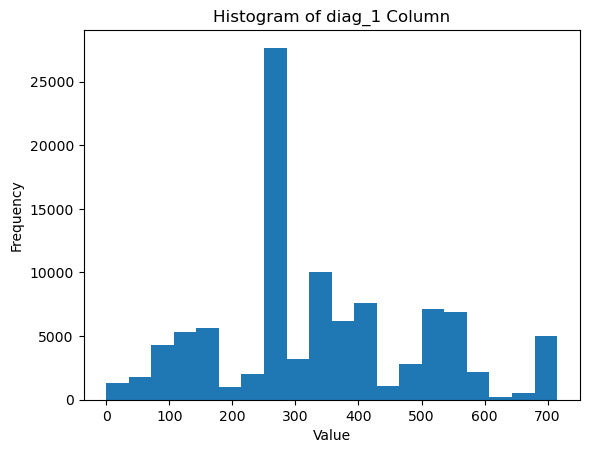

276    6883
263    6581
540    4016
259    3614
325    3508
275    2766
329    2275
501    2151
475    2042
282    2028
534    2019
693    1967
143    1889
236    1687
121    1680
417    1595
405    1520
708    1207
119    1183
348    1115
572    1082
397    1057
331    1056
283    1016
382     989
394     965
163     896
381     876
120     871
102     851
287     840
281     789
695     784
508     771
97      675
398     663
100     625
339     610
543     561
298     546
360     531
554     515
255     513
365     450
254     449
264     449
162     447
510     440
303     426
30      425
694     424
101     417
123     412
145     379
519     367
152     365
411     350
253     346
322     339
409     335
380     335
54      320
147     319
576     316
99      313
22      311
274     288
388     286
454     285
391     277
361     276
342     270
541     267
111     267
256     262
495     257
260     254
55      242
392     239
310     236
565     235
95      235
375     234
516 

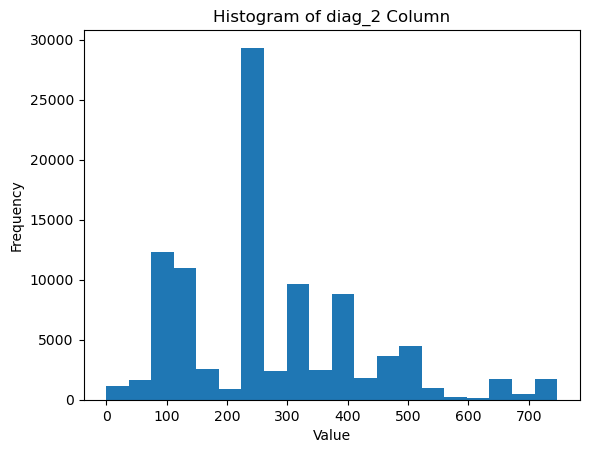

133    6821
261    6487
78     5782
260    4893
239    3605
318    3184
397    3146
241    2729
249    2615
246    2557
80     1985
464    1963
386    1806
385    1569
313    1529
142    1473
79     1415
258    1399
509    1390
444    1352
310    1329
333    1287
257    1043
248    1028
102     856
315     844
162     663
515     621
137     580
648     547
245     539
514     503
326     486
225     462
646     435
129     410
272     403
727     402
373     398
25      392
379     391
152     387
364     378
517     374
647     367
45      365
244     354
376     341
240     334
282     333
380     326
518     323
528     307
46      294
259     292
144     290
345     283
160     272
135     266
271     258
457     253
485     242
724     241
390     226
95      222
192     220
81      220
520     216
314     213
516     204
242     198
3       196
351     196
104     194
529     193
350     186
44      185
267     184
110     182
323     181
235     178
487     176
513     175
50  

KeyError: 'diag3'

In [32]:
cols_with_outlier =["payer_code","diag_1","diag_2","diag3","acarbose","chlorpropamide","number_outpatient","medical_specialty","miglitol","troglitazone","metformin","glyburide-metformin"]

for col in cols_with_outlier:
    category_counts = df[col].value_counts()

    plt.hist(df[col], bins=20)  # Adjust the number of bins as needed
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col} Column')
    plt.show()

    print(df[col].value_counts())

    threshold = 40

    rare_categories = category_counts[category_counts < threshold].index
    df = df[~ df[col].isin(rare_categories)]


    print(df[col].value_counts())


In [ ]:
# another way remove outliers for numerical

#IQR = Q3 - Q1
#lower_limit = Q1 - 1.5 * IQR
#upper_limit = Q3 + 1.5* IQR
#df = diabetic_df[(diabetic_df.number_outpatient>lower_limit) &(diabetic_df.number_outpatient< upper_limit) ] 

#df

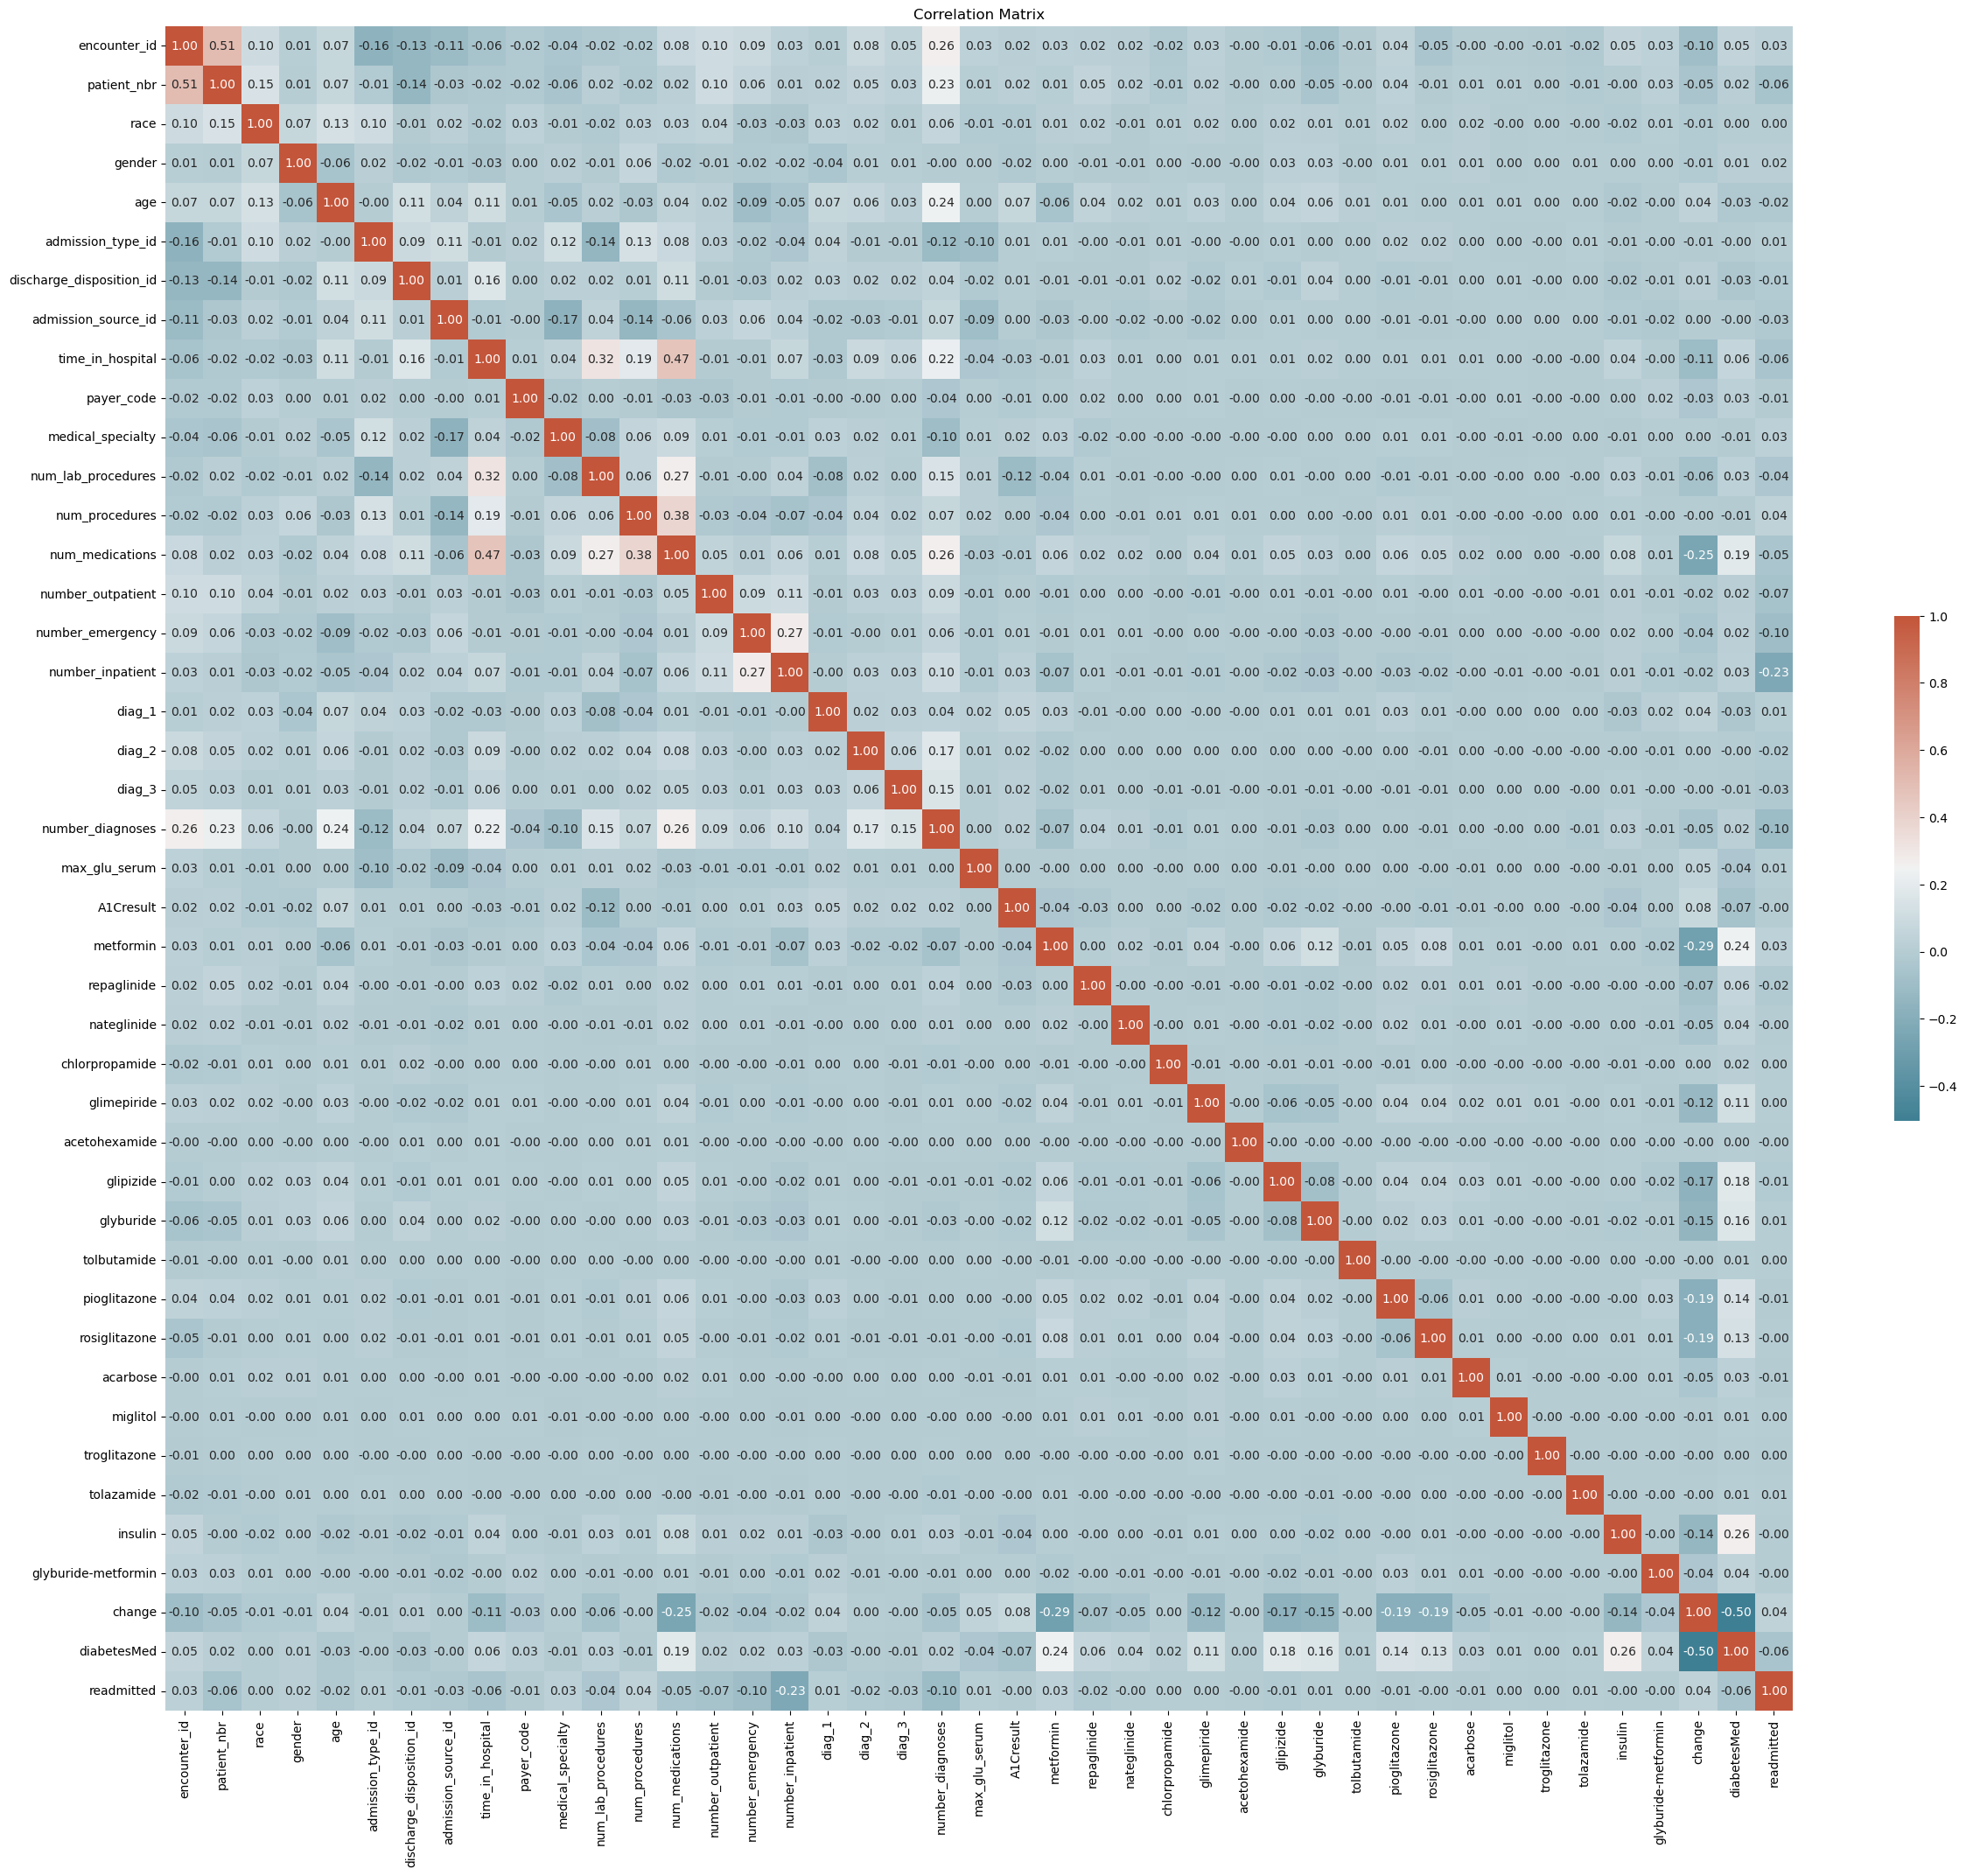

In [33]:
correlation_matrix = df.corr()

plt.figure(figsize=(30, 25))
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(correlation_matrix, cmap=cmap, annot=True, fmt=".2f", cbar_kws={"shrink": 0.3})
plt.title('Correlation Matrix')

plt.show()

In [ ]:
mapping_df = pd.read_csv("IDs_mapping.csv")
mapping_df


<html> 
    <div  style="font-family: Georgia ;background-image: linear-gradient(to left,  rgb(255, 255, 255), rgba(127, 170, 225,0.8)); width: auto;height : 50px; margin: 1px; padding: 0.5px;"> <h1>  Questions: </h1>
    </div>
    
</html>

<html> 
        <hr/>
    <div  style="font-family: Georgia ;background-image: linear-gradient(to left,  rgb(255, 255, 255), rgba(127, 170, 225,0.2)); width: auto;height : 100px; margin: 1px; padding: 0.5px;"> <h1>  Q1: What preprocessing steps did you perform on the dataset? Provide clear reasons for each decision made.</h1>
    </div>

</html>


     1. we removed columns that had so many missing values.
     2. we removed rows that had errors or had outliers.
     3. we handled outliers by removing or replacing them.
     4. we encoded categorical columns.
 

 Preprocessing a dataset is a crucial step in data analysis and machine learning, as it ensures the data is clean, consistent, and ready for modeling. Here's a detailed explanation of the common preprocessing steps that might be performed on a dataset:

### 1. Data Cleaning
**a. Handling Missing Values:**
- **Removal:** Rows or columns with a significant proportion of missing values can be removed.
- **Imputation:** Missing values can be filled using various strategies, such as mean, median, mode, or more sophisticated methods like k-nearest neighbors (KNN) or regression-based imputation.

**b. Handling Outliers:**
- **Detection:** Identify outliers using statistical methods (e.g., Z-score, IQR) or visualization techniques (e.g., box plots).
- **Treatment:** Outliers can be removed or transformed, depending on the context. For example, they can be capped at a certain value or replaced with the mean/median.

**c. Noise Removal:**
- Techniques like smoothing, aggregation, or using filters (e.g., moving average) can help reduce noise in the data.

### 2. Data Transformation
**a. Scaling and Normalization:**
- **Standardization:** Transform data to have a mean of zero and a standard deviation of one.
- **Normalization:** Scale data to a range between 0 and 1 or -1 and 1, using min-max scaling or other normalization techniques.

**b. Encoding Categorical Variables:**
- **Label Encoding:** Convert categorical labels into integer codes.
- **One-Hot Encoding:** Create binary columns for each category.
- **Binary Encoding:** Convert categories to binary digits.
- **Target Encoding:** Encode categories based on the mean of the target variable.

**c. Log Transformation:**
- Applied to skewed data to reduce skewness and make the distribution more normal-like.

**d. Polynomial Features:**
- Create interaction terms or polynomial terms to capture non-linear relationships.

### 3. Feature Engineering
**a. Feature Creation:**
- Generate new features based on existing data, such as aggregating features over time periods, creating ratios, or using domain knowledge to craft meaningful features.

**b. Feature Selection:**
- **Filter Methods:** Select features based on statistical tests (e.g., chi-square, ANOVA).
- **Wrapper Methods:** Use algorithms like recursive feature elimination (RFE) to select features.
- **Embedded Methods:** Utilize regularization techniques (e.g., Lasso, Ridge) to select features during model training.

### 4. Data Integration
- **Merging Datasets:** Combine multiple data sources using keys or indexes to create a single comprehensive dataset.
- **Handling Duplicates:** Identify and remove duplicate records to ensure data integrity.

### 5. Data Reduction
**a. Dimensionality Reduction:**
- Techniques like Principal Component Analysis (PCA), Linear Discriminant Analysis (LDA), or t-SNE can reduce the number of features while preserving variance.

**b. Sampling:**
- **Downsampling:** Reduce the number of samples in a large dataset.
- **Upsampling:** Increase the number of samples in a small dataset, often used in imbalanced classification problems.

### 6. Data Splitting
- Split the dataset into training, validation, and test sets to ensure the model is evaluated on unseen data.

### Example Workflow
Here’s an example workflow combining these steps:

1. **Data Cleaning:**
   - Remove rows with more than 50% missing values.
   - Impute missing values with the median.
   - Detect and remove outliers using the IQR method.

2. **Data Transformation:**
   - Standardize numerical features.
   - One-hot encode categorical variables.

3. **Feature Engineering:**
   - Create new features based on domain knowledge.
   - Select top features using a combination of filter and wrapper methods.

4. **Data Integration:**
   - Merge data from multiple sources on a common key.
   - Remove duplicate records.

5. **Data Reduction:**
   - Apply PCA to reduce dimensionality.

6. **Data Splitting:**
   - Split the data into 70% training, 15% validation, and 15% test sets.

By following these preprocessing steps, the dataset becomes clean, consistent, and ready for effective modeling and analysis.

<html> 
        <hr/>
    <div  style="font-family: Georgia ;background-image: linear-gradient(to left,  rgb(255, 255, 255), rgba(127, 170, 225,0.2)); width: auto;height : 100px; margin: 1px; padding: 0.5px;"> <h1>  Q2: What portion of the dataset did you retain during dimensionality reduction, and which variables were retained? Could you elaborate on the rationale behind this decision?
</h1>
    </div>

</html>

<html> 
        <hr/>
    <div  style="font-family: Georgia ;background-image: linear-gradient(to left,  rgb(255, 255, 255), rgba(127, 170, 225,0.2)); width: auto;height : 100px; margin: 1px; padding: 0.5px;"> <h1>  Q3: Include a plot illustrating the silhouette coefficient plotted against the input parameters for each clustering method within the report file.
 </h1>
    </div>

</html>


<html> 
        <hr/>
    <div  style="font-family: Georgia ;background-image: linear-gradient(to left,  rgb(255, 255, 255), rgba(127, 170, 225,0.2)); width: auto;height : 100px; margin: 1px; padding: 0.5px;"> <h1>  Q4: How can we determine the optimal number of clusters in K-Means</h1>
    </div>

</html>

Determining the optimal number of clusters in K-Means clustering is crucial for achieving meaningful results. Here are several methods commonly used to find the optimal number of clusters:

### 1. Elbow Method
The Elbow Method involves plotting the sum of squared distances from each point to its assigned cluster center (within-cluster sum of squares, or WCSS) against the number of clusters (k). The idea is to identify an "elbow point" where the rate of decrease sharply slows. This point suggests that adding more clusters beyond this does not significantly improve the model.

**Steps:**
- Run K-Means with a range of k values (e.g., from 1 to 10).
- Calculate the WCSS for each k.
- Plot the WCSS against the number of clusters.
- Look for the elbow point in the plot where the WCSS starts to flatten.

### 2. Silhouette Analysis
The Silhouette Score measures how similar an object is to its own cluster compared to other clusters. It ranges from -1 to 1, where a higher value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

**Steps:**
- Run K-Means for a range of k values.
- Calculate the average silhouette score for each k.
- Plot the silhouette scores against the number of clusters.
- Choose the k with the highest average silhouette score.

### 3. Gap Statistic
The Gap Statistic compares the total within intra-cluster variation for different numbers of clusters with their expected values under null reference distribution of the data. The optimal number of clusters is where this gap is the largest.

**Steps:**
- Run K-Means for a range of k values.
- Calculate the WCSS for each k.
- Generate B reference datasets and calculate their WCSS.
- Compute the gap statistic.
- Choose the k with the maximum gap statistic.

### 4. Davies-Bouldin Index
The Davies-Bouldin Index evaluates the average similarity ratio of each cluster with its most similar cluster. Lower values indicate better clustering.

**Steps:**
- Run K-Means for a range of k values.
- Calculate the Davies-Bouldin Index for each k.
- Plot the index against the number of clusters.
- Choose the k with the lowest Davies-Bouldin Index.

### 5. Bayesian Information Criterion (BIC) / Akaike Information Criterion (AIC)
BIC and AIC can be used in the context of Gaussian Mixture Models (GMM), which is a probabilistic model related to K-Means. These criteria balance model fit and complexity.

**Steps:**
- Fit a GMM for a range of k values.
- Calculate the BIC and AIC for each k.
- Plot BIC and AIC against the number of clusters.
- Choose the k with the lowest BIC or AIC.

### Practical Considerations
- **Domain Knowledge**: Incorporate any domain-specific knowledge about the data to guide the selection of k.
- **Visual Inspection**: Use visual methods like plotting clusters to see if the clusters make sense.
- **Stability**: Check the stability of the clustering by running the algorithm multiple times and ensuring consistent results.

Using a combination of these methods can provide a more robust determination of the optimal number of clusters.


<html> 
        <hr/>
    <div  style="font-family: Georgia ;background-image: linear-gradient(to left,  rgb(255, 255, 255), rgba(127, 170, 225,0.2)); width: auto;height : 100px; margin: 1px; padding: 0.5px;"> <h1>  Q5: How can we determine the optimal epsilon value and minPts in DBSCAN?
</h1>
    </div>

</html>
Determining the optimal parameters \( \epsilon \) (epsilon) and \( \text{minPts} \) (minimum points) in DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is crucial for achieving effective clustering. Here are several methods to find these parameters:

### 1. Determining \( \epsilon \)
The parameter \( \epsilon \) defines the maximum distance between two points to be considered neighbors. One common approach to find an appropriate value for \( \epsilon \) is to use the **k-distance graph**.

**Steps:**
1. **Calculate k-distances**: Compute the distance from each point to its \( k \)-th nearest neighbor. A common choice for \( k \) is the same value as \(\text{minPts}\).
2. **Plot the k-distances**: Sort these distances in ascending order and plot them.
3. **Find the "knee" point**: Look for the "knee" or "elbow" point in the plot, where the k-distance starts to increase rapidly. This point is a good candidate for \( \epsilon \).

### 2. Determining \(\text{minPts}\)
The parameter \(\text{minPts}\) defines the minimum number of points required to form a dense region.

**Guidelines for \(\text{minPts}\)**:
- **Rule of thumb**: A common heuristic is \(\text{minPts} = 2 \times \text{dim}\), where \(\text{dim}\) is the number of dimensions in the dataset. For example, in a 2-dimensional dataset, \(\text{minPts} = 4\).
- **Data characteristics**: If the dataset has noise or is more spread out, a higher \(\text{minPts}\) might be required.
- **Domain knowledge**: Consider the domain knowledge to select \(\text{minPts}\). For example, in social networks, clusters might represent groups of at least 5 people, so \(\text{minPts} = 5\).

### 3. Iterative Approach
Often, it is beneficial to use an iterative approach to refine both \(\epsilon\) and \(\text{minPts}\):

**Steps**:
1. **Initial estimation**:
   - Use the k-distance plot to estimate \(\epsilon\).
   - Choose an initial \(\text{minPts}\) based on the rule of thumb or domain knowledge.
2. **Run DBSCAN**:
   - Perform DBSCAN with the chosen \(\epsilon\) and \(\text{minPts}\).
3. **Evaluate results**:
   - Examine the resulting clusters. Check for the presence of too many noise points or overly large/small clusters.
   - Adjust \(\epsilon\) and \(\text{minPts}\) based on the clustering outcome and repeat the process.

### 4. Silhouette Analysis for DBSCAN
Silhouette analysis can be adapted for DBSCAN to evaluate different parameter choices:

**Steps**:
1. **Run DBSCAN** with different combinations of \(\epsilon\) and \(\text{minPts}\).
2. **Calculate silhouette scores**: Compute the silhouette score for each clustering result. The silhouette score measures how similar each point is to its own cluster compared to other clusters.
3. **Choose optimal parameters**: Select the combination of \(\epsilon\) and \(\text{minPts}\) that maximizes the average silhouette score.

### 5. Grid Search
Conduct a grid search over a range of \(\epsilon\) and \(\text{minPts}\) values to find the optimal combination:

**Steps**:
1. **Define ranges** for \(\epsilon\) and \(\text{minPts}\).
2. **Run DBSCAN** for each combination of parameters within these ranges.
3. **Evaluate clustering results**: Use evaluation metrics such as the number of clusters, the percentage of noise points, and domain-specific validation methods.
4. **Select the best parameters**: Choose the parameters that yield the best performance according to the chosen metrics.

### Practical Considerations
- **Noise**: High noise levels in the dataset might require higher \(\text{minPts}\) or different \(\epsilon\) values.
- **Data scale**: Standardize or normalize the data if features have different scales to ensure that \(\epsilon\) is meaningful.
- **Domain knowledge**: Incorporate domain knowledge to guide parameter selection.

By combining these methods, you can systematically determine the optimal \(\epsilon\) and \(\text{minPts}\) values for DBSCAN, leading to more meaningful clustering results.


<html> 
        <hr/>
    <div  style="font-family: Georgia ;background-image: linear-gradient(to left,  rgb(255, 255, 255), rgba(127, 170, 225,0.2)); width: auto;height : 100px; margin: 1px; padding: 0.5px;"> <h1>  Q6: When would you recommend using K-Means, and when would you suggest using DBSCAN instead?

</h1>
    </div>

</html>


Choosing between K-Means and DBSCAN depends on the characteristics of your dataset and the specific requirements of your clustering task. Here are some guidelines to help decide which algorithm to use:

### When to Use K-Means

1. **Well-Defined, Spherical Clusters**:
   - K-Means is best suited for datasets where the clusters are spherical or convex in shape. It works well when clusters are relatively equally sized and have similar densities.

2. **Large, Homogeneous Data**:
   - K-Means can handle large datasets efficiently, especially when clusters are roughly similar in size and density.

3. **Low-Dimensional Data**:
   - K-Means performs well on low-dimensional data where the concept of distance (e.g., Euclidean distance) is meaningful.

4. **Speed and Scalability**:
   - K-Means is computationally efficient and scales well to large datasets. It has a linear time complexity with respect to the number of data points.

5. **Known Number of Clusters (k)**:
   - K-Means requires the number of clusters (k) to be specified in advance. Use K-Means when you have a good estimate of the number of clusters.

6. **Smooth Cluster Boundaries**:
   - If clusters have smooth and clear boundaries, K-Means is likely to perform well.

### When to Use DBSCAN

1. **Arbitrary Shaped Clusters**:
   - DBSCAN excels at identifying clusters of arbitrary shapes, including elongated or irregularly shaped clusters. It does not assume spherical clusters.

2. **Handling Noise and Outliers**:
   - DBSCAN can effectively identify and handle noise points, labeling them as outliers. This is useful for datasets with a significant amount of noise.

3. **Varying Density Clusters**:
   - DBSCAN can find clusters of varying densities, making it suitable for datasets where clusters have different densities.

4. **No Need for Predefined Number of Clusters**:
   - DBSCAN does not require specifying the number of clusters in advance. It discovers the number of clusters based on the density of points.

5. **High-Dimensional Data**:
   - DBSCAN can be effective for high-dimensional data, though the choice of distance metric and parameter tuning becomes more challenging.

6. **Non-Linearly Separable Data**:
   - When clusters are not linearly separable, DBSCAN can be a better choice as it can find clusters based on density rather than distance alone.

### Practical Scenarios

#### Use K-Means If:
- You have a large dataset with roughly spherical, equally sized clusters.
- You know the approximate number of clusters in advance.
- Your data is low-dimensional, and computational efficiency is a priority.
- You are looking for a simple, fast algorithm to partition your data into clusters.

#### Use DBSCAN If:
- Your clusters have arbitrary shapes and are not well-separated.
- Your data contains noise and outliers, and you want the algorithm to identify and exclude them.
- You do not know the number of clusters in advance.
- Your data has varying densities across clusters.
- You are dealing with spatial data or data that naturally forms density-based clusters.

### Examples

- **K-Means**:
  - Customer segmentation based on purchasing behavior where clusters are expected to be spherical.
  - Grouping similar images based on pixel values in image processing tasks where the number of groups is predefined.

- **DBSCAN**:
  - Identifying geographic regions of different population densities from spatial data.
  - Clustering gene expression data where clusters have irregular shapes and there is noise in the data.

By considering these guidelines and the specific characteristics of your dataset, you can choose the clustering algorithm that is best suited for your needs.
